In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [6]:
import pathlib
data_dir ="/home/selva/Selva/Products/Task/Datas/Images"
data_dir = pathlib.Path(data_dir)

In [7]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

570


In [8]:
axis_bank = list(data_dir.glob('axis bank/*'))
PIL.Image.open(str(Banana[0]))

NameError: name 'Banana' is not defined

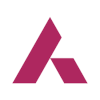

In [9]:
PIL.Image.open(str(axis_bank[1]))


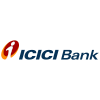

In [10]:
icici_bank = list(data_dir.glob('icici bank/*'))
PIL.Image.open(str(icici_bank[0]))

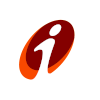

In [11]:
PIL.Image.open(str(icici_bank[1]))


In [12]:
batch_size = 32
img_height = 180
img_width = 180

In [13]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 570 files belonging to 6 classes.
Using 456 files for training.


In [14]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 570 files belonging to 6 classes.
Using 114 files for validation.


In [16]:
class_names = train_ds.class_names
print(class_names)

['axis bank', 'icici bank', 'iob bank', 'sbi bank', 'standard chartered bank', 'yes bank']


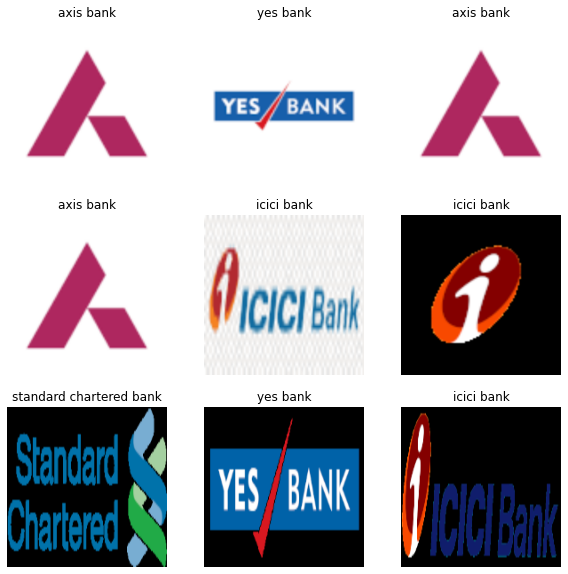

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [18]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [17]:
# AUTOTUNE = tf.data.AUTOTUNE

# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [52]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)


In [53]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.13825728 1.0


In [54]:
num_classes = 6

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [55]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [56]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_4 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 22, 22, 64)       

In [58]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
15/15 [==============================] - 3s 225ms/step - loss: 1.4310e-05 - accuracy: 1.0000 - val_loss: 1.5127e-05 - val_accuracy: 1.0000
Epoch 2/10
15/15 [==============================] - 3s 226ms/step - loss: 1.3290e-05 - accuracy: 1.0000 - val_loss: 1.4106e-05 - val_accuracy: 1.0000
Epoch 3/10
15/15 [==============================] - 3s 227ms/step - loss: 1.2371e-05 - accuracy: 1.0000 - val_loss: 1.3125e-05 - val_accuracy: 1.0000
Epoch 4/10
15/15 [==============================] - 3s 230ms/step - loss: 1.1593e-05 - accuracy: 1.0000 - val_loss: 1.2253e-05 - val_accuracy: 1.0000
Epoch 5/10
15/15 [==============================] - 3s 227ms/step - loss: 1.0870e-05 - accuracy: 1.0000 - val_loss: 1.1500e-05 - val_accuracy: 1.0000
Epoch 6/10
15/15 [==============================] - 3s 229ms/step - loss: 1.0254e-05 - accuracy: 1.0000 - val_loss: 1.0805e-05 - val_accuracy: 1.0000
Epoch 7/10
15/15 [==============================] - 3s 225ms/step - loss: 9.6692e-06 - accuracy: 1.0

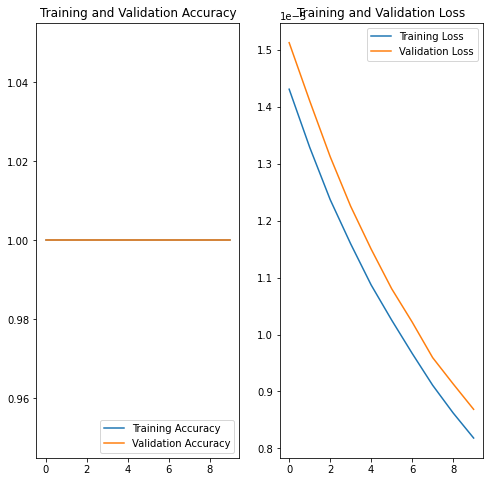

In [59]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [60]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

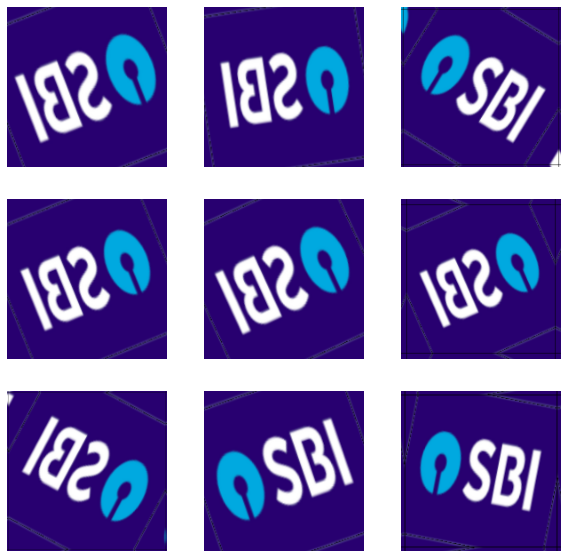

In [61]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [62]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [63]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [64]:
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_4 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_5 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 45, 45, 64)       

In [65]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
15/15 [==============================] - 4s 273ms/step - loss: 1.8305 - accuracy: 0.3706 - val_loss: 0.8617 - val_accuracy: 0.6842
Epoch 2/15
15/15 [==============================] - 4s 272ms/step - loss: 0.5558 - accuracy: 0.8443 - val_loss: 0.2410 - val_accuracy: 0.9123
Epoch 3/15
15/15 [==============================] - 4s 266ms/step - loss: 0.1342 - accuracy: 0.9561 - val_loss: 0.0157 - val_accuracy: 1.0000
Epoch 4/15
15/15 [==============================] - 4s 260ms/step - loss: 0.0350 - accuracy: 0.9912 - val_loss: 0.0091 - val_accuracy: 1.0000
Epoch 5/15
15/15 [==============================] - 4s 265ms/step - loss: 0.0161 - accuracy: 0.9978 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 6/15
15/15 [==============================] - 4s 266ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 7/15
15/15 [==============================] - 4s 260ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 6.4421e-04 - val_accuracy: 1.0000
Ep

In [20]:
model.save('/home/selva/Selva/Products/Task/Datas/model/logomdl1.h5')

NameError: name 'model' is not defined

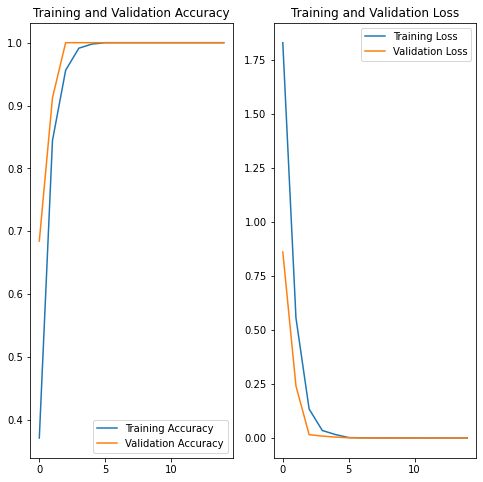

In [66]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [19]:
# sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
# sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
sunflower_path='/home/selva/Selva/Products/Task/Datas/ys1.png'
img = keras.preprocessing.image.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

NameError: name 'model' is not defined

In [31]:
## Model use
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
modelx = load_model('/home/selva/Selva/Products/Task/Datas/model/logomdl1.h5')
import cv2

from keras.models import load_model
from PIL import ImageTk, Image
import numpy as np
import matplotlib.pyplot as plt

file_path=r'/home/selva/Selva/Products/Task/Datas/ic1.png'

testimg=cv2.imread(file_path)

img = keras.preprocessing.image.load_img(
    file_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = modelx.predict(img_array)
score = tf.nn.softmax(predictions[0])

# print(
#     "This image most likely belongs to {} with a {:.2f} percent confidence."
#     .format(class_names[np.argmax(score)], 100 * np.max(score))
# )

print('The output is',format(class_names[np.argmax(score)]))


The output is icici bank


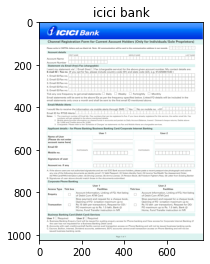

In [32]:
plt.imshow(testimg)
plt.title(str(format(class_names[np.argmax(score)])))
plt.show()
